In [2]:
#Import du data set et des libs
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#chargement du jeu de donnees
wine_dataframe = pd.read_csv('modified_datatest.csv', index_col=0)
print(len(wine_dataframe))
wine_dataframe = wine_dataframe.drop('URLS', axis=1)
wine_dataframe = wine_dataframe.drop('Tranquille to Mousseux', axis=1)
wine_dataframe = wine_dataframe[wine_dataframe['Red'] != 1]
wine_dataframe = wine_dataframe.drop('Red', axis=1)
print(len(wine_dataframe))

wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].str.replace(';', '')
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].str.replace(';', '')
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].str.replace(';', '')
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].str.replace(';', '')
wine_dataframe['Léger to Puissant'] = wine_dataframe['Léger to Puissant'].astype(float)
wine_dataframe['Souple to Tannique'] = wine_dataframe['Souple to Tannique'].astype(float)
wine_dataframe['Sec to Moelleux'] = wine_dataframe['Sec to Moelleux'].astype(float)
wine_dataframe['Doux to Acide'] = wine_dataframe['Doux to Acide'].astype(float)
wine_dataframe = wine_dataframe.reset_index(drop=True)
wine_dataframe.head(5)

35218
11382


,Léger to Puissant,Souple to Tannique,Sec to Moelleux,Doux to Acide,Aromas,Olphactive,Cépages
0,65.201545,0.0,37.437689,54.676918,"miel, truffe/crème, huile/boisé, beurre//Minér...",d'ananas/miel/agrumes/d'épices/fruits (d'arbre...,Chardonnay
1,66.713719,0.0,0.000000,79.210939,"miel, truffe/beurre, caramel/crème, levure/poi...",de crème/fermenté (levuré)/salé/de noisette/me...,Chardonnay
2,65.576832,0.0,34.564391,55.524817,"beurre, boisé/banane, crème/miel, fumée//Boisé...",d'ananas/miel/agrumes/d'épices/fruits (d'arbre...,Chardonnay
3,67.706619,0.0,30.949437,54.600156,"miel, pierre/beurre, boisé/crème, huile///Miné...",d'ananas/miel/agrumes/d'épices/fruits (d'arbre...,Chardonnay
4,75.775295,0.0,0.000000,77.456138,"miel, fumée/boisé, caramel/crème, levure/foin,...",de caramel écossais/minéral & terre/noisette/d...,Chardonnay


In [4]:
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('/+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace(',+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('/+', '+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace(',+', '+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã©', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.replace('Ã‰', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã©', 'é')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.replace('Ã‰', 'é')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lower()
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lower()
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.lstrip('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.lstrip('+')
wine_dataframe['Aromas'] = wine_dataframe['Aromas'].str.split('+')
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].str.split('+')

wine_dataframe['Aromas'] = wine_dataframe['Aromas'].apply(lambda x: [] if isinstance(x, float) else x)
wine_dataframe['Olphactive'] = wine_dataframe['Olphactive'].apply(lambda x: [] if isinstance(x, float) else x)
print(wine_dataframe.describe())

       Léger to Puissant  Souple to Tannique  Sec to Moelleux  Doux to Acide
count       11382.000000        11382.000000     11382.000000   11382.000000
mean           42.132041            0.062885        21.970883      44.151488
std            25.479150            1.908402        16.187063      28.705128
min             0.000000            0.000000         0.000000       0.000000
25%             0.000000            0.000000         0.000000       0.000000
50%            51.971440            0.000000        25.118579      54.604228
75%            59.500000            0.000000        32.407044      65.337973
max            85.000000           75.890601        69.905003      85.000000


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [5]:
value_counts = wine_dataframe['Olphactive'].apply(lambda x: type(x).__name__).value_counts()
print(value_counts)

list    11382
Name: Olphactive, dtype: int64


In [9]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Aromas_one_hot_encoded = mlb.fit_transform(wine_dataframe['Aromas'])
Aromas_df_encoded = pd.DataFrame(Aromas_one_hot_encoded, columns=mlb.classes_)
Olphactive_one_hot_encoded = mlb.fit_transform(wine_dataframe['Olphactive'])
Olphactive_df_encoded = pd.DataFrame(Olphactive_one_hot_encoded, columns=mlb.classes_)
df_concatenated_0 = pd.concat([wine_dataframe, Aromas_df_encoded], axis=1)
df_concatenated = pd.concat([df_concatenated_0, Olphactive_df_encoded], axis=1)

df_concatenated.drop('Aromas', axis=1, inplace=True)
df_concatenated.drop('Olphactive', axis=1, inplace=True)

# count the number of observations per variety
counts = df_concatenated['Cépages'].value_counts()
print(counts)

Chardonnay    8108
Riesling      3274
Name: Cépages, dtype: int64


In [8]:
for i, row in df_concatenated.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        df_concatenated = df_concatenated.drop(i) 
print(df_concatenated['Cépages'].value_counts())

Chardonnay    5633
Riesling      2820
Name: Cépages, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
X = df_concatenated.drop('Cépages', axis=1)
y = df_concatenated['Cépages']
#X = X.values
#y = y.tolist()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=42)


In [10]:
train_merged = pd.merge(X_train, y_train, left_index=True, right_index=True, how='inner') 
train_merged_deleted = train_merged[(train_merged['Léger to Puissant'] != 0) |
                               (train_merged['Souple to Tannique'] != 0) |
                               (train_merged['Sec to Moelleux'] != 0) |
                               (train_merged['Doux to Acide'] != 0)]

means = train_merged_deleted.groupby('Cépages').mean()
for i, row in train_merged.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        train_merged.loc[i, 'Léger to Puissant'] = means.loc[row['Cépages'], 'Léger to Puissant']
        train_merged.loc[i, 'Souple to Tannique'] = means.loc[row['Cépages'], 'Souple to Tannique']
        train_merged.loc[i, 'Sec to Moelleux'] = means.loc[row['Cépages'], 'Sec to Moelleux']
        train_merged.loc[i, 'Doux to Acide'] = means.loc[row['Cépages'], 'Doux to Acide']
X_train = train_merged.drop('Cépages', axis=1)
y_train = train_merged['Cépages']

test_merged = pd.merge(X_test, y_test, left_index=True, right_index=True, how='inner') 
for i, row in test_merged.iterrows():
    if row['Léger to Puissant'] == 0 and row['Souple to Tannique'] == 0 and row['Sec to Moelleux'] == 0 and row['Doux to Acide'] == 0:
        test_merged = test_merged.drop(i) 

X_test = test_merged.drop('Cépages', axis=1)
y_test = test_merged['Cépages']

X_train = X_train.values
y_train = y_train.tolist()
X_test = X_test.values
y_test = y_test.tolist()



# 2) PREDICT

In [11]:
classifier = SVC(C=100.0, kernel='rbf', degree=3, gamma='auto')
classifier.fit(X_train, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Chardonnay       0.98      0.98      0.98       566
    Riesling       0.96      0.95      0.96       280

    accuracy                           0.97       846
   macro avg       0.97      0.97      0.97       846
weighted avg       0.97      0.97      0.97       846



In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_model = SVC()
param_grid = {'C': [100, 150, 200], 'kernel': ['rbf'], 'gamma': ['auto']}

In [13]:
grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose = 4, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.977 total time=   1.7s
[CV 2/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.969 total time=   1.5s
[CV 3/3] END .....C=100, gamma=auto, kernel=rbf;, score=0.976 total time=   1.6s
[CV 1/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.976 total time=   1.6s
[CV 2/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.968 total time=   1.5s
[CV 3/3] END .....C=150, gamma=auto, kernel=rbf;, score=0.976 total time=   1.6s
[CV 1/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.976 total time=   1.7s
[CV 2/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.968 total time=   1.6s
[CV 3/3] END .....C=200, gamma=auto, kernel=rbf;, score=0.976 total time=   1.6s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [100, 150, 200], 'gamma': ['auto'],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=4)

In [14]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best score:  0.9739715486864237


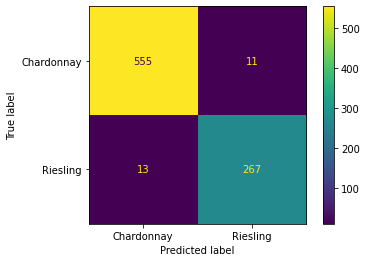

In [15]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Chardonnay","Riesling"])

cm_display.plot()
plt.show()